In [2]:
# import libraries needed
import pandas as pd
import datetime

import random
random.seed(42)

# import libraries needed
import glob
from natsort import natsorted
import json
import tldextract
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
AllClassesDF = pd.read_json("/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/Data/AllClassesDF.json", orient="records")
libDF = pd.read_json("/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/Data/libDF.json", orient="records")
conDF = pd.read_json("/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/Data/conDF.json", orient="records")
resDF = pd.read_json("/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/Data/resDF.json", orient="records")
trainDF = pd.read_json("/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/Data/trainDF.json", orient="records")
testDF = pd.read_json("/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/Data/testDF.json", orient="records")
devDF = pd.read_json("/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/Data/devDF.json", orient="records")

## word stat

In [79]:
# get stats on sentences and words
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

lib_data = libDF.copy()
lib_data['totalsentences'] = lib_data['article'].apply(sent_tokenize).tolist()
lib_data['totalsentences'] = lib_data['totalsentences'].apply(len)
print(lib_data['totalsentences'].describe())

Conserv_data = conDF.copy()
Conserv_data['totalsentences'] = Conserv_data['article'].apply(sent_tokenize).tolist()
Conserv_data['totalsentences'] = Conserv_data['totalsentences'].apply(len)
print(Conserv_data['totalsentences'].describe())

Res_data = resDF.copy()
Res_data['totalsentences'] = Res_data['article'].apply(sent_tokenize).tolist()
Res_data['totalsentences'] = Res_data['totalsentences'].apply(len)
print(Res_data['totalsentences'].describe())

[nltk_data] Downloading package punkt to /home/ravi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


count    7.248800e+04
mean     1.012707e+02
std      6.776882e+03
min      1.000000e+00
25%      2.500000e+01
50%      4.000000e+01
75%      6.300000e+01
max      1.817204e+06
Name: totalsentences, dtype: float64
count     79573.000000
mean         58.882812
std        1089.587655
min           1.000000
25%          21.000000
50%          33.000000
75%          50.000000
max      292507.000000
Name: totalsentences, dtype: float64
count    2.250830e+05
mean     9.813549e+01
std      5.774769e+03
min      1.000000e+00
25%      1.900000e+01
50%      3.100000e+01
75%      5.000000e+01
max      2.426530e+06
Name: totalsentences, dtype: float64


In [83]:
# get stats on sentences and words
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

lib_data = libDF.copy()
lib_data['totalwords'] = lib_data['article'].apply(word_tokenize).tolist()
lib_data['totalwords'] = lib_data['totalwords'].apply(len)
print(lib_data['totalwords'].describe())

Conserv_data = conDF.copy()
Conserv_data['totalwords'] = Conserv_data['article'].apply(word_tokenize).tolist()
Conserv_data['totalwords'] = Conserv_data['totalwords'].apply(len)
print(Conserv_data['totalwords'].describe())

Res_data = resDF.copy()
Res_data['totalwords'] = Res_data['article'].apply(word_tokenize).tolist()
Res_data['totalwords'] = Res_data['totalwords'].apply(len)
print(Res_data['totalwords'].describe())

count    7.248800e+04
mean     2.835243e+03
std      1.552167e+05
min      2.590000e+02
25%      6.710000e+02
50%      1.064000e+03
75%      1.669000e+03
max      4.108975e+07
Name: totalwords, dtype: float64
count    7.957300e+04
mean     2.271860e+03
std      2.146790e+05
min      2.710000e+02
25%      5.720000e+02
50%      8.460000e+02
75%      1.294000e+03
max      6.046294e+07
Name: totalwords, dtype: float64
count    2.250830e+05
mean     3.381638e+03
std      1.466217e+05
min      2.670000e+02
25%      5.210000e+02
50%      7.900000e+02
75%      1.273000e+03
max      5.441928e+07
Name: totalwords, dtype: float64


## top_ngrams => data analysis folder

## word cloud

In [3]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk_stopwords = set(stopwords.words("english"))
nltk_stopwords.update(["u"])

def get_wordcloud(df):
    comment_words = ''
    stopwords = set(nltk_stopwords)

    # Iterate through the DataFrame column
    for val in df.article:
        # Typecast each value to string
        val = str(val)
        # Split the value into tokens
        tokens = val.split()
        # Convert each token to lowercase
        tokens = [token.lower() for token in tokens]
        # Join the tokens
        comment_words += " ".join(tokens) + " "

    # remove non letters
    comment_words = re.sub(r'[^A-Za-z]', '', comment_words)
    # Specify a TrueType font for the WordCloud object
    font_path = "/home/ravi/Downloads/07558_CenturyGothic.ttf"  # Replace with the path to your TrueType font file

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        collocations=False,
        min_font_size=10,
        font_path=font_path
    ).generate(comment_words)

    return wordcloud


[nltk_data] Downloading package stopwords to /home/ravi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# plot the WordCloud image         
import re
lib_wordcloud = get_wordcloud(libDF)

plt.figure(figsize = (6, 3), facecolor = None)
plt.imshow(lib_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

# plt.savefig('/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/PaperFigsTables/Word_count_VS_Percentage_of_True_Articles.png', 
#             format='png', dpi=1200, bbox_inches='tight')
plt.show()

## popular domains

In [53]:
libDF.head(1)

WordCount                       _id  \
0        893  613f5688013f9c836df825db   

                                             article     author  \
0  Front page layout Site theme Sign up or login ...  BigLove99   

  author_flair_text  created_utc           domain      id  num_comments  \
0                     1491358039  arstechnica.com  63iqc8             3   

   score                                                url   url_domain  \
0    208  https://arstechnica.com/tech-policy/2017/04/tr...  arstechnica   

   label        date  
0      0  2017-04-05

In [69]:
res_domains = resDF.domain.unique()
if 'libDF.domain.unique()' in res_domains:
    res_domains = res_domains[res_domains != 'libDF.domain.unique()']

print(res_domains, len(res_domains))

['listverse.com' 'healio.com' 'nytimes.com' ... 'news.rutgers.edu'
 'rightoftherightnews.com' 'radfag.com'] 9735


In [58]:
libDoms = libDF.domain.value_counts()
conDoms = conDF.domain.value_counts()
resDoms = resDF.domain.value_counts()

In [65]:
sum(libDoms[:10])/sum(libDoms), sum(conDoms[:10])/sum(conDoms), sum(resDoms[:10])/sum(resDoms)

(0.2931381745944156, 0.39130106945823334, 0.35217230977017366)

In [63]:
sum(libDoms[:10]), sum(conDoms[:10]), sum(resDoms[:10])

(21249, 31137, 79268)

In [70]:
libDoms[:20]

politico.com           3340
theguardian.com        2680
salon.com              2641
huffingtonpost.com     2351
theatlantic.com        2110
nytimes.com            1995
thedailybeast.com      1920
motherjones.com        1782
dailykos.com           1379
businessinsider.com    1051
thehill.com            1031
nbcnews.com             999
economist.com           891
fivethirtyeight.com     838
reuters.com             818
vox.com                 764
usatoday.com            754
cnn.com                 737
nymag.com               709
apnews.com              704
Name: domain, dtype: int64

In [71]:
conDoms[:20]

breitbart.com          4765
dailycaller.com        4503
foxnews.com            3666
washingtontimes.com    2827
hotair.com             2819
americanthinker.com    2772
dailywire.com          2747
townhall.com           2643
liveaction.org         2551
politico.com           1844
redstate.com           1562
nypost.com             1487
nationalreview.com     1486
thehill.com            1334
pjmedia.com            1329
freebeacon.com         1210
tampafp.com            1154
dailymail.co.uk         878
cnsnews.com             860
reason.com              818
Name: domain, dtype: int64

In [72]:
resDoms[:20]

breitbart.com           23615
dailycaller.com         10902
foxnews.com             10580
dailymail.co.uk          7732
vdare.com                7651
theguardian.com          4124
amerika.org              4058
washingtontimes.com      3886
townhall.com             3666
americanthinker.com      3054
nypost.com               3026
dailywire.com            2991
yahoo.com                2985
wikileaks.org            2922
en.wikipedia.org         2462
bbc.com                  2439
express.co.uk            2406
freebeacon.com           2283
politico.com             2196
thegatewaypundit.com     2175
Name: domain, dtype: int64

## plot time line

In [18]:
def plotTimeline(df):
    
    df['date']=pd.to_datetime(df['created_utc'], unit='s')
    df['date']=pd.to_datetime(df['date']).dt.date

    return df

In [19]:
AllClassesDF = plotTimeline(AllClassesDF)
libDF = plotTimeline(libDF)
conDF = plotTimeline(conDF)
resDF = plotTimeline(resDF)
trainDF = plotTimeline(trainDF)
testDF = plotTimeline(testDF)
devDF = plotTimeline(devDF)

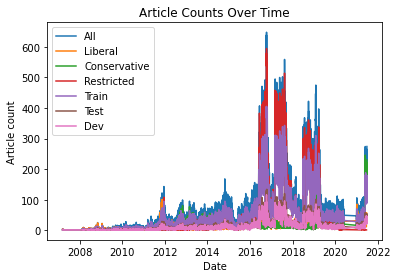

In [52]:
plt.figsize=(12,3)
plt.grid()

AllClassesDF.date.value_counts().sort_values().plot(kind = 'line', label='All')
libDF.date.value_counts().sort_values().plot(kind = 'line', label='Liberal')
conDF.date.value_counts().sort_values().plot(kind = 'line', label='Conservative')
resDF.date.value_counts().sort_values().plot(kind = 'line', label='Restricted')
trainDF.date.value_counts().sort_values().plot(kind = 'line', label='Train')
testDF.date.value_counts().sort_values().plot(kind = 'line', label='Test')
devDF.date.value_counts().sort_values().plot(kind = 'line', label='Dev')

# Set the title and labels for the plot
plt.title('Article Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Article count')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.show()

# plt.savefig('/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/PaperFigsTables/Word_count_VS_Percentage_of_True_Articles.png', format='png', dpi=1200, bbox_inches='tight')


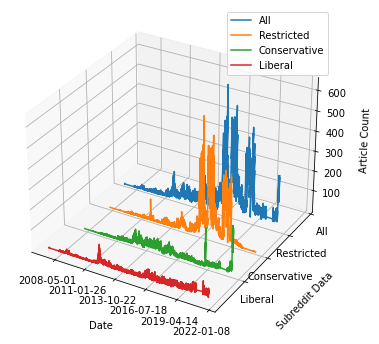

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

# Set up the figure and axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Get the date counts for each category
lib_date_counts = libDF['date'].value_counts().sort_index()
con_date_counts = conDF['date'].value_counts().sort_index()
res_date_counts = resDF['date'].value_counts().sort_index()
all_date_counts = AllClassesDF['date'].value_counts().sort_index()

# Convert dates to numeric representation
x_lib = mdates.date2num(lib_date_counts.index)
x_con = mdates.date2num(con_date_counts.index)
x_res = mdates.date2num(res_date_counts.index)
x_all = mdates.date2num(all_date_counts.index)
y_lib = [1] * len(lib_date_counts)  # Assign y=1 for Liberal
y_con = [2] * len(con_date_counts)  # Assign y=2 for Conservative
y_res = [3] * len(res_date_counts)  # Assign y=3 for Restricted
y_all = [4] * len(all_date_counts)  # Assign y=4 for All
z_lib = lib_date_counts.values
z_con = con_date_counts.values
z_res = res_date_counts.values
z_all = all_date_counts.values

# Plot the lines
ax.plot(x_all, y_all, z_all, label='All')
ax.plot(x_res, y_res, z_res, label='Restricted')
ax.plot(x_con, y_con, z_con, label='Conservative')
ax.plot(x_lib, y_lib, z_lib, label='Liberal')


# Set the title and labels for the plot
# ax.set_title('Article Counts Over Time')
ax.set_xlabel('Date', labelpad=10)
ax.set_ylabel('Subreddit Data', labelpad=15)
ax.set_zlabel('Article Count', labelpad=10)

# Format the date axis
date_formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set y-axis tick labels
ax.set_yticks([2, 3, 4, 5])
ax.set_yticklabels(['Liberal', 'Conservative', 'Restricted', 'All'])

# Add a legend
ax.legend(loc='best')

# Show the plot
plt.show()


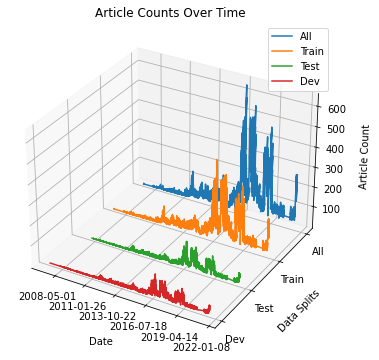

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

# Set up the figure and axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Get the date counts for each category
dev_date_counts = devDF['date'].value_counts().sort_index()
test_date_counts = testDF['date'].value_counts().sort_index()
train_date_counts = trainDF['date'].value_counts().sort_index()
all_date_counts = AllClassesDF['date'].value_counts().sort_index()

# Convert dates to numeric representation
x_dev = mdates.date2num(dev_date_counts.index)
x_test = mdates.date2num(test_date_counts.index)
x_train = mdates.date2num(train_date_counts.index)
x_all = mdates.date2num(all_date_counts.index)
y_dev = [1] * len(dev_date_counts)  # Assign y=1 for Dev
y_test = [2] * len(test_date_counts)  # Assign y=2 for Test
y_train = [3] * len(train_date_counts)  # Assign y=3 for Train
y_all = [4] * len(all_date_counts)  # Assign y=4 for All

# Plot the lines
ax.plot(x_all, y_all, all_date_counts.values, label='All')
ax.plot(x_train, y_train, train_date_counts.values, label='Train')
ax.plot(x_test, y_test, test_date_counts.values, label='Test')
ax.plot(x_dev, y_dev, dev_date_counts.values, label='Dev')

# Set the title and labels for the plot
ax.set_title('Article Counts Over Time')
ax.set_xlabel('Date', labelpad=10)
ax.set_ylabel('Data Splits', labelpad=10)
ax.set_zlabel('Article Count', labelpad=10)

# Format the date axis
date_formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set y-axis tick labels
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['Dev', 'Test', 'Train', 'All'])

# Add a legend
ax.legend(loc='best')

# Show the plot
plt.show()


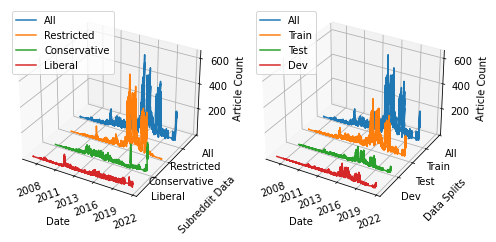

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

# Set up the figure and axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121, projection='3d')

# Get the date counts for each category
lib_date_counts = libDF['date'].value_counts().sort_index()
con_date_counts = conDF['date'].value_counts().sort_index()
res_date_counts = resDF['date'].value_counts().sort_index()
all_date_counts = AllClassesDF['date'].value_counts().sort_index()

# Convert dates to numeric representation
x_lib = mdates.date2num(lib_date_counts.index)
x_con = mdates.date2num(con_date_counts.index)
x_res = mdates.date2num(res_date_counts.index)
x_all = mdates.date2num(all_date_counts.index)
y_lib = [1] * len(lib_date_counts)  # Assign y=1 for Liberal
y_con = [2] * len(con_date_counts)  # Assign y=2 for Conservative
y_res = [3] * len(res_date_counts)  # Assign y=3 for Restricted
y_all = [4] * len(all_date_counts)  # Assign y=4 for All
z_lib = lib_date_counts.values
z_con = con_date_counts.values
z_res = res_date_counts.values
z_all = all_date_counts.values

# Plot the lines
ax.plot(x_all, y_all, z_all, label='All')
ax.plot(x_res, y_res, z_res, label='Restricted')
ax.plot(x_con, y_con, z_con, label='Conservative')
ax.plot(x_lib, y_lib, z_lib, label='Liberal')


# Set the title and labels for the plot
# ax.set_title('Article Counts Over Time')
ax.set_xlabel('Date', labelpad=10)
ax.set_ylabel('Subreddit Data', labelpad=15)
ax.set_zlabel('Article Count')

# Format the date axis
date_formatter = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_formatter)
# Set x-axis tick parameters
# ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(rotation=20)

# Set y-axis tick labels
ax.set_yticks([2, 3, 4, 5])
ax.set_yticklabels(['Liberal', 'Conservative', 'Restricted', 'All'])

# Add a legend
ax.legend(loc='best')

ax = fig.add_subplot(122, projection='3d')

# Get the date counts for each category
dev_date_counts = devDF['date'].value_counts().sort_index()
test_date_counts = testDF['date'].value_counts().sort_index()
train_date_counts = trainDF['date'].value_counts().sort_index()
all_date_counts = AllClassesDF['date'].value_counts().sort_index()

# Convert dates to numeric representation
x_dev = mdates.date2num(dev_date_counts.index)
x_test = mdates.date2num(test_date_counts.index)
x_train = mdates.date2num(train_date_counts.index)
x_all = mdates.date2num(all_date_counts.index)
y_dev = [1] * len(dev_date_counts)  # Assign y=1 for Dev
y_test = [2] * len(test_date_counts)  # Assign y=2 for Test
y_train = [3] * len(train_date_counts)  # Assign y=3 for Train
y_all = [4] * len(all_date_counts)  # Assign y=4 for All

# Plot the lines
ax.plot(x_all, y_all, all_date_counts.values, label='All')
ax.plot(x_train, y_train, train_date_counts.values, label='Train')
ax.plot(x_test, y_test, test_date_counts.values, label='Test')
ax.plot(x_dev, y_dev, dev_date_counts.values, label='Dev')

# Set the title and labels for the plot
# ax.set_title('Article Counts Over Time')
ax.set_xlabel('Date', labelpad=10)
ax.set_ylabel('Data Splits', labelpad=10)
ax.set_zlabel('Article Count')

# Format the date axis
date_formatter = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_formatter)
# Set x-axis tick parameters
# ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(rotation=20)

# Set y-axis tick labels
ax.set_yticks([2, 3, 4, 5])
ax.set_yticklabels(['Dev', 'Test', 'Train', 'All'])

# Add a legend
ax.legend(loc='best')

# Save
plt.savefig('/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/PaperFigsTables/Date_VS_Articles_Count.png', format='png', dpi=1200, bbox_inches='tight')

# Show the plot
plt.show()


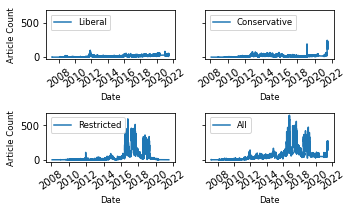

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(5, 3), sharey=True)

# Get the date counts for each category
lib_date_counts = libDF['date'].value_counts().sort_index()
con_date_counts = conDF['date'].value_counts().sort_index()
res_date_counts = resDF['date'].value_counts().sort_index()
all_date_counts = AllClassesDF['date'].value_counts().sort_index()

# Convert dates to numeric representation
x_lib = mdates.date2num(lib_date_counts.index)
x_con = mdates.date2num(con_date_counts.index)
x_res = mdates.date2num(res_date_counts.index)
x_all = mdates.date2num(all_date_counts.index)
z_lib = lib_date_counts.values
z_con = con_date_counts.values
z_res = res_date_counts.values
z_all = all_date_counts.values

# Plot the lines in the subplots
axs[0, 0].plot(lib_date_counts.index, z_lib)
axs[0, 0].set_xlabel('Date', fontsize=8.5)
axs[0, 0].set_ylabel('Article Count', fontsize=8.5)

axs[0, 1].plot(con_date_counts.index, z_con)
axs[0, 1].set_xlabel('Date', fontsize=8.5)

axs[1, 0].plot(res_date_counts.index, z_res)
axs[1, 0].set_xlabel('Date', fontsize=8.5)
axs[1, 0].set_ylabel('Article Count', fontsize=8.5)

axs[1, 1].plot(all_date_counts.index, z_all)
axs[1, 1].set_xlabel('Date', fontsize=8.5)

# Create legends for each subplot with font size 10
axs[0, 0].legend(['Liberal'], loc='upper left', fontsize=8.5)
axs[0, 1].legend(['Conservative'], loc='upper left', fontsize=8.5)
axs[1, 0].legend(['Restricted'], loc='upper left', fontsize=8.5)
axs[1, 1].legend(['All'], loc='upper left', fontsize=8.5)

# Format the date axis in all subplots
date_formatter = mdates.DateFormatter('%Y')
for ax in axs.flat:
    ax.xaxis.set_major_formatter(date_formatter)
    ax.xaxis.set_tick_params(rotation=35)

# Adjust spacing between subplots
fig.tight_layout()

# Save the figure
plt.savefig('/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/PaperFigsTables/DateVSArticlesCountRawData.png', format='png', dpi=1200)

# Show the plot
plt.show()


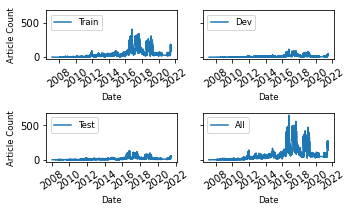

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(5, 3), sharey=True)

# Get the date counts for each category
dev_date_counts = devDF['date'].value_counts().sort_index()
test_date_counts = testDF['date'].value_counts().sort_index()
train_date_counts = trainDF['date'].value_counts().sort_index()
all_date_counts = AllClassesDF['date'].value_counts().sort_index()

# Convert dates to numeric representation
x_dev = mdates.date2num(dev_date_counts.index)
x_test = mdates.date2num(test_date_counts.index)
x_train = mdates.date2num(train_date_counts.index)
x_all = mdates.date2num(all_date_counts.index)

# Plot the lines in the subplots
axs[0, 0].plot(train_date_counts.index, train_date_counts.values)
axs[0, 0].set_xlabel('Date', fontsize=8.5)
axs[0, 0].set_ylabel('Article Count', fontsize=8.5)

axs[0, 1].plot(dev_date_counts.index, dev_date_counts.values)
axs[0, 1].set_xlabel('Date', fontsize=8.5)

axs[1, 0].plot(test_date_counts.index, test_date_counts.values)
axs[1, 0].set_xlabel('Date', fontsize=8.5)
axs[1, 0].set_ylabel('Article Count', fontsize=8.5)

axs[1, 1].plot(all_date_counts.index, all_date_counts.values)
axs[1, 1].set_xlabel('Date', fontsize=8.5)

# Create legends for each subplot with font size 10
axs[0, 0].legend(['Train'], loc='upper left', fontsize=8.5)
axs[0, 1].legend(['Dev'], loc='upper left', fontsize=8.5)
axs[1, 0].legend(['Test'], loc='upper left', fontsize=8.5)
axs[1, 1].legend(['All'], loc='upper left', fontsize=8.5)

# Format the date axis in all subplots
date_formatter = mdates.DateFormatter('%Y')
for ax in axs.flat:
    ax.xaxis.set_major_formatter(date_formatter)
    ax.xaxis.set_tick_params(rotation=35)

# Adjust spacing between subplots
fig.tight_layout()

# Save the figure
plt.savefig('/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/PaperFigsTables/DateVSArticlesCountSplitData.png', format='png', dpi=1200)

# Show the plot
plt.show()

## parallel sets plot

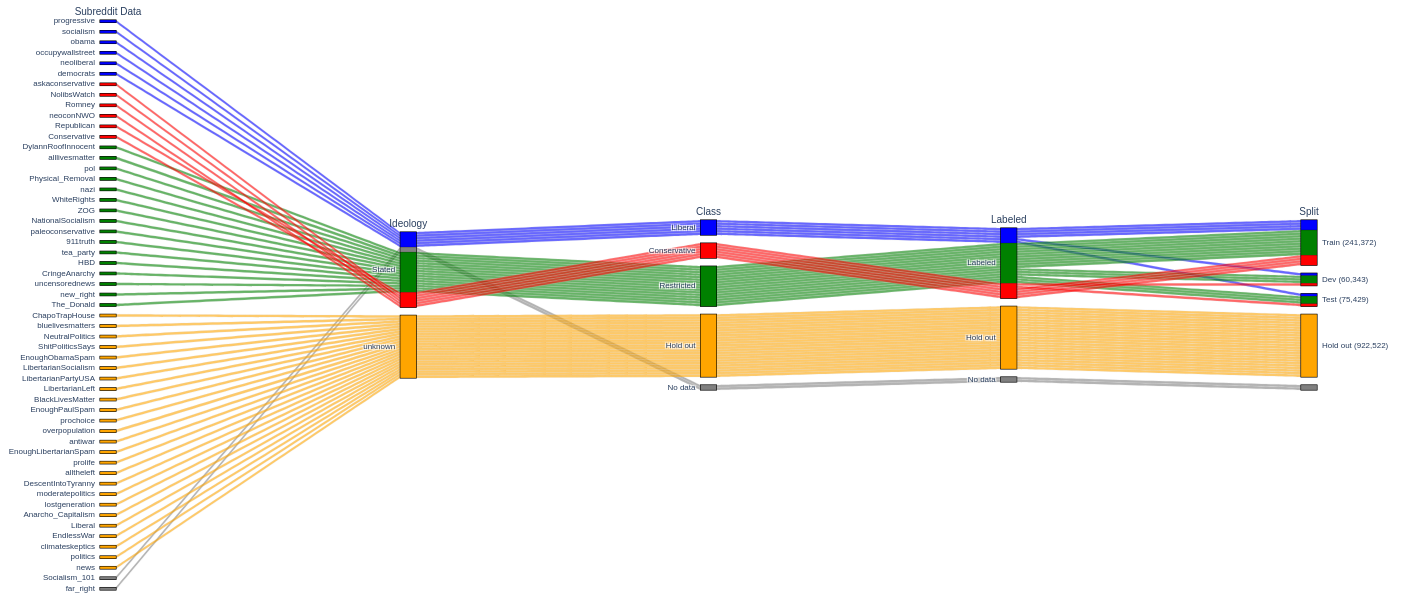

In [1]:
import plotly.graph_objects as go
import plotly.io as pio

al = [ "progressive", "socialism", "obama", "occupywallstreet", "neoliberal", "democrats", "askaconservative", "NolibsWatch", "Romney", "neoconNWO", "Republican", "Conservative", "DylannRoofInnocent", "alllivesmatter", "pol", "Physical_Removal", "nazi", "WhiteRights", "ZOG", "NationalSocialism", "paleoconservative", "911truth", "tea_party", "HBD", "CringeAnarchy", "uncensorednews", "new_right", "The_Donald", "ChapoTrapHouse", "bluelivesmatters", "NeutralPolitics", "ShitPoliticsSays", "EnoughObamaSpam", "LibertarianSocialism", "LibertarianPartyUSA", "LibertarianLeft", "BlackLivesMatter", "EnoughPaulSpam", "prochoice", "overpopulation", "antiwar", "EnoughLibertarianSpam", "prolife", "alltheleft", "DescentIntoTyranny", "moderatepolitics", "lostgeneration", "Anarcho_Capitalism", "Liberal", "EndlessWar", "climateskeptics", "politics", "news", "Socialism_101", "far_right" ]
ideology = ["Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "Stated", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "unknown", "Stated", "Stated"]
Classes = [ "Liberal", "Liberal", "Liberal", "Liberal", "Liberal", "Liberal", "Conservative", "Conservative", "Conservative", "Conservative", "Conservative", "Conservative", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Restricted", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "No data", "No data" ]
Labeled = [ "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "No data", "No data" ]
Split = [ "Train (241,372)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Dev (60,343)", "Test (75,429)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Dev (60,343)", "Test (75,429)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Train (241,372)", "Dev (60,343)", "Dev (60,343)", "Dev (60,343)", "Test (75,429)", "Test (75,429)", "Test (75,429)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "Hold out (922,522)", "", ""]

# Split = [ "Train", "Train", "Train", "Train", "Dev", "Test", "Train", "Train", "Train", "Train", "Dev", "Test", "Train", "Train", "Train", "Train", "Train", "Train", "Train", "Train", "Train", "Train", "Dev", "Dev", "Dev", "Test", "Test", "Test", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Hold out", "Discard", "Discard" ]
# Labeled = [ "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "Labeled", "", "", "","", "","", "", "", "", "", "", "","", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""]
# Split = [ "Train", "Train", "Train", "Train", "Dev", "Test", "Train", "Train", "Train", "Train", "Dev", "Test", "Train", "Train", "Train", "Train", "Train", "Train", "Train", "Train", "Train", "Train", "Dev", "Dev", "Dev", "Test", "Test", "Test", "", "", "","", "","", "", "", "", "", "", "","", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""]

colors = {
    "Liberal": "blue",
    "Conservative": "red",
    "Restricted": "green",
    "Hold out": "orange",
    "No data": "gray"
}

category_colors = [colors[label] for label in Classes]

fig = go.Figure(go.Parcats(
    dimensions=[
        {
            'label': 'Subreddit Data',
            'values': al,
            'categoryorder': 'array',
            'categoryarray': al,
            # 'ticktext': al,
            # 'tickangle': 45
        },
        {
            'label': 'Ideology',
            'values': ideology,
            'categoryorder': 'array',
            # 'categoryarray': ideology,
            # 'ticktext': ideology,
            # 'tickangle': 45
        },
        {
            'label': 'Class',
            'values': Classes,
            'categoryorder': 'array',
            # 'categoryarray': labeling,
            # 'ticktext': labeling,
            # 'tickangle': 45
        },
        {
            'label': 'Labeled',
            'values': Labeled,
            'categoryorder': 'array',
            # 'categoryarray': labeling,
            # 'ticktext': labeling,
            # 'tickangle': 45
        },
        {
            'label': 'Split',
            'values': Split,
            'categoryorder': 'array',
            # 'categoryarray': labeling,
            # 'ticktext': labeling,
            # 'tickangle': 45
        },
    ],
    line={'color': category_colors}
))

fig.update_layout(
    autosize=False,
    width=430,
    height=600,
    margin=dict(l=60, r=50, b=10, t=20),
    font=dict(size=10)
)

pio.write_image(fig, 
                '/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/PROJECTS_DATA/PaperFigsTables/Data_Collection_and_Labeling_shortWidth.png',
               scale=2)


fig.show()
